<a href="https://colab.research.google.com/github/vari404/neural-computation-project/blob/main/Neural_Network_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- EXPERIMENT 1: XOR LOGIC GATE ---
Training Feed-Forward Network for 10000 epochs...
Training Complete.
>> Graph generated.


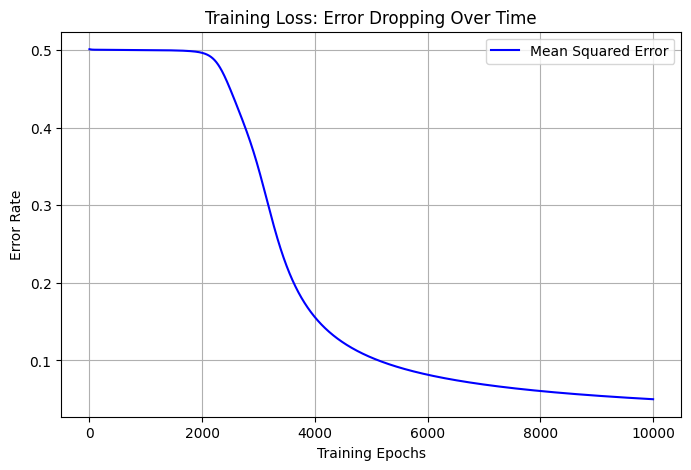


--- EXPERIMENT 2: RNN SEQUENCE MEMORY ---
Task: Detect memory state changes in sequence [1, 0, 0, 1]
Processing Sequence: [1, 0, 0, 1]
Time Step 0: Input=1 | Hidden Memory State=0.133773
Time Step 1: Input=0 | Hidden Memory State=0.026785
Time Step 2: Input=0 | Hidden Memory State=0.006483
Time Step 3: Input=1 | Hidden Memory State=0.134363


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# PART 1: Feed-Forward Network (The XOR Problem)
# ==========================================

class SimpleNeuralNet:
    def __init__(self):
        # IMPROVED: Initialize weights between -1 and 1.
        # This helps the network learn much faster than 0 to 1
        self.weights1 = np.random.uniform(-1, 1, (2, 4)) # 2 Input -> 4 Hidden
        self.weights2 = np.random.uniform(-1, 1, (4, 1)) # 4 Hidden -> 1 Output
        self.output = np.zeros(1)
        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, inputs, expected_output, epochs=10000):
        print(f"Training Feed-Forward Network for {epochs} epochs...")

        for epoch in range(epochs):
            # 1. Forward Propagation
            self.layer1 = self.sigmoid(np.dot(inputs, self.weights1))
            self.output = self.sigmoid(np.dot(self.layer1, self.weights2))

            # 2. Calculate Error (MSE)
            error = expected_output - self.output
            self.loss_history.append(np.mean(np.abs(error)))

            # 3. Backpropagation
            # Calculate gradient for Layer 2
            d_weights2 = np.dot(self.layer1.T, (2 * error * self.sigmoid_derivative(self.output)))

            # Calculate gradient for Layer 1
            d_weights1 = np.dot(inputs.T,  (np.dot(2 * error * self.sigmoid_derivative(self.output), self.weights2.T) * self.sigmoid_derivative(self.layer1)))

            # 4. Update Weights
            self.weights1 += d_weights1 * 0.1
            self.weights2 += d_weights2 * 0.1

        print("Training Complete.")
        self.plot_loss()

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label='Mean Squared Error', color='blue')
        plt.title('Training Loss: Error Dropping Over Time')
        plt.xlabel('Training Epochs')
        plt.ylabel('Error Rate')
        plt.grid(True)
        plt.legend()

        # Save graph
        plt.savefig('loss_graph.png')
        print(">> Graph generated.")
        plt.show()

# ==========================================
# PART 2: Recurrent Neural Network (Sequence Memory)
# ==========================================

class SimpleRNN:
    """
    A manual implementation of a Recurrent Neural Network (RNN).
    """
    def __init__(self, input_size, hidden_size, output_size):
        # Slightly larger weights so the memory effect is visible in printouts
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.1
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.1
        self.Why = np.random.randn(output_size, hidden_size) * 0.1
        self.hidden_size = hidden_size

    def forward(self, inputs):
        # Initialize hidden state h_0 as zeros
        h = np.zeros((self.hidden_size, 1))

        outputs = []
        hidden_states = []

        for i, x in enumerate(inputs):
            x_array = np.array([[x]])

            # Recurrence: Combine Memory (Whh) with Input (Wxh)
            h = np.tanh(np.dot(self.Whh, h) + np.dot(self.Wxh, x_array))

            y = np.dot(self.Why, h)

            outputs.append(y)
            hidden_states.append(h.copy()) # Save a COPY of the state

        return outputs, hidden_states

# ==========================================
# EXECUTION BLOCK
# ==========================================

if __name__ == "__main__":
    print("--- EXPERIMENT 1: XOR LOGIC GATE ---")
    inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
    expected_output = np.array([[0], [1], [1], [0]])

    nn = SimpleNeuralNet()
    nn.train(inputs, expected_output)

    print("\n--- EXPERIMENT 2: RNN SEQUENCE MEMORY ---")
    print("Task: Detect memory state changes in sequence [1, 0, 0, 1]")

    # This is the line that was likely cut off
    rnn = SimpleRNN(input_size=1, hidden_size=4, output_size=1)
    test_sequence = [1, 0, 0, 1]

    outputs, hidden_states = rnn.forward(test_sequence)

    print(f"Processing Sequence: {test_sequence}")
    # Print the state for each specific time step
    for t, (out, h_state) in enumerate(zip(outputs, hidden_states)):
        # Calculate the "strength" of the memory vector
        norm_val = np.linalg.norm(h_state)
        print(f"Time Step {t}: Input={test_sequence[t]} | Hidden Memory State={norm_val:.6f}")